In [1]:
import os
import numpy as np
import cv2 as cv
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [24]:
import import_ipynb
from image_processing_functions import read_image, canny_edge_response, adaptive_gaussian_threshold, \
    adaptive_mean_threshold, automatic_canny_edge_response, harris_corner_response, hough_line_detect_response, \
    hough_line_intersections, houghp_line_detect_response, houghp_line_points, corners_on_image, \
    crop_image, warp_image
from hierarchical_clusterizations import *
from kmeans_clusterizations import *

filename = 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg'
filename_2 = "C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 2/train/0028.png"

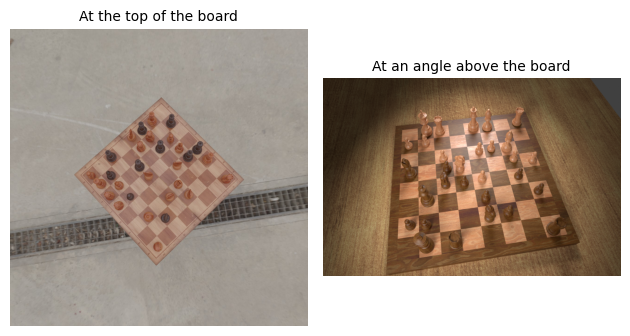

In [3]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(mpimg.imread("C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/28.jpg"))
axes[0].set_title('At the top of the board', fontsize=10)
axes[0].axis('off')

axes[1].imshow(mpimg.imread("C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 2/train/0028.png"))
axes[1].set_title('At an angle above the board', fontsize=10)
axes[1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

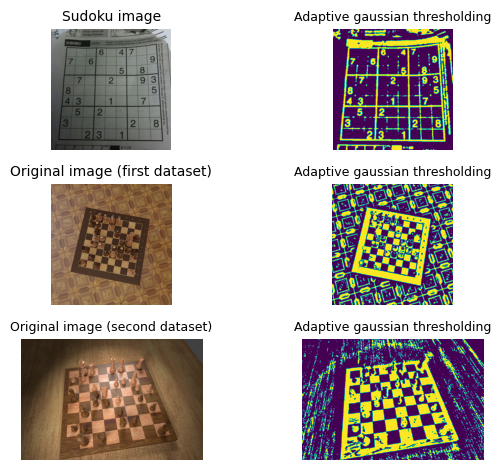

In [46]:
fig, axes = plt.subplots(3, 2)

axes[0,0].imshow(mpimg.imread('results/hsLhe.jpg'))
axes[0,0].set_title('Sudoku image', fontsize=10)
axes[0,0].axis('off')

axes[0,1].imshow(adaptive_gaussian_threshold(read_image('results/hsLhe.jpg')))
axes[0,1].set_title('Adaptive gaussian thresholding', fontsize=9)
axes[0,1].axis('off')

axes[1,0].imshow(mpimg.imread(filename))
axes[1,0].set_title('Original image (first dataset)', fontsize=10)
axes[1,0].axis('off')

axes[1,1].imshow(adaptive_gaussian_threshold(read_image(filename)))
axes[1,1].set_title('Adaptive gaussian thresholding', fontsize=9)
axes[1,1].axis('off')

axes[2,0].imshow(mpimg.imread(filename_2))
axes[2,0].set_title('Original image (second dataset)', fontsize=9)
axes[2,0].axis('off')

axes[2,1].imshow(adaptive_gaussian_threshold(read_image(filename_2)))
axes[2,1].set_title('Adaptive gaussian thresholding', fontsize=9)
axes[2,1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

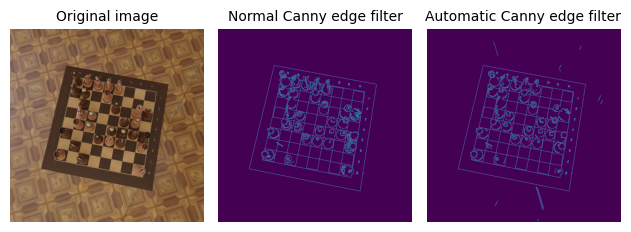

In [5]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(1, 3)

# Plot each image in a separate subplot
axes[0].imshow(mpimg.imread(filename))
axes[0].set_title('Original image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(canny_edge_response(read_image(filename)))
axes[1].set_title('Normal Canny edge filter', fontsize=10)
axes[1].axis('off')

axes[2].imshow(automatic_canny_edge_response(read_image(filename)))
axes[2].set_title('Automatic Canny edge filter', fontsize=10)
axes[2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

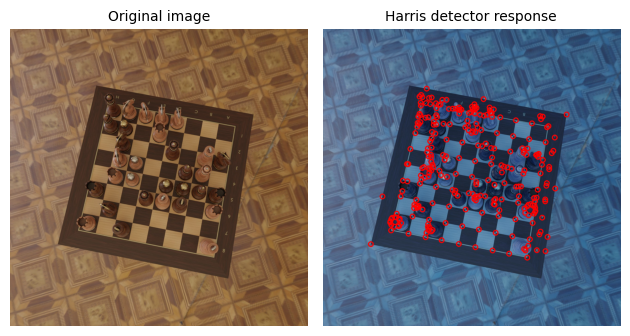

In [6]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(mpimg.imread(filename))
axes[0].set_title('Original image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(harris_corner_response(read_image(filename))['img'])
axes[1].set_title('Harris detector response', fontsize=10)
axes[1].axis('off')

plt.tight_layout()

plt.show()

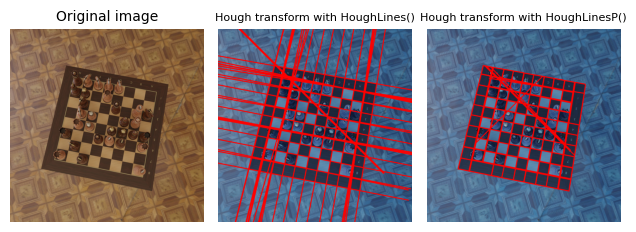

In [7]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(mpimg.imread(filename))
axes[0].set_title('Original image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(hough_line_detect_response(read_image(filename))['img'])
axes[1].set_title('Hough transform with HoughLines()', fontsize=8)
axes[1].axis('off')

axes[2].imshow(houghp_line_detect_response(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)['img'])
axes[2].set_title('Hough transform with HoughLinesP()', fontsize=8)
axes[2].axis('off')

plt.tight_layout()

plt.show()

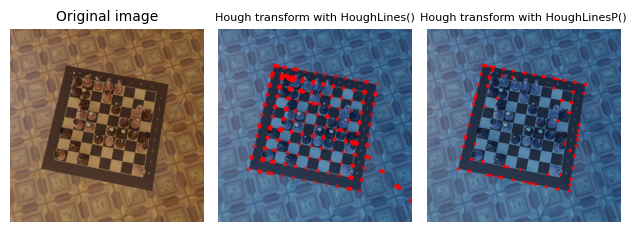

In [8]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(mpimg.imread(filename))
axes[0].set_title('Original image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(hough_line_intersections(read_image(filename))['img'])
axes[1].set_title('Hough transform with HoughLines()', fontsize=8)
axes[1].axis('off')

axes[2].imshow(houghp_line_points(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)['img'])
axes[2].set_title('Hough transform with HoughLinesP()', fontsize=8)
axes[2].axis('off')

plt.tight_layout()

plt.show()

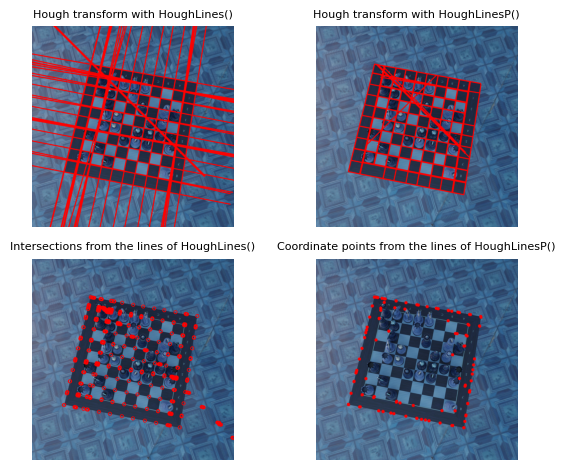

In [9]:
fig, axes = plt.subplots(2, 2)

axes[0,0].imshow(hough_line_detect_response(read_image(filename))['img'])
axes[0,0].set_title('Hough transform with HoughLines()', fontsize=8)
axes[0,0].axis('off')

axes[0,1].imshow(houghp_line_detect_response(read_image(filename))['img'])
axes[0,1].set_title('Hough transform with HoughLinesP()', fontsize=8)
axes[0,1].axis('off')

axes[1,0].imshow(hough_line_intersections(read_image(filename))['img'])
axes[1,0].set_title('Intersections from the lines of HoughLines()', fontsize=8)
axes[1,0].axis('off')

axes[1,1].imshow(houghp_line_points(read_image(filename))['img'])
axes[1,1].set_title('Coordinate points from the lines of HoughLinesP()', fontsize=8)
axes[1,1].axis('off')

plt.tight_layout()

plt.show()

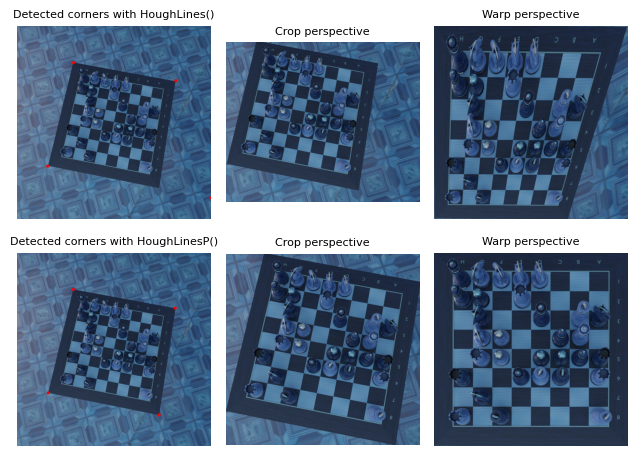

In [10]:
fig, axes = plt.subplots(2, 3)

axes[0,0].imshow(corners_on_image(read_image(filename), hough_line_intersections)['img'])
axes[0,0].set_title('Detected corners with HoughLines()', fontsize=8)
axes[0,0].axis('off')

axes[0,1].imshow(crop_image(read_image(filename), hough_line_intersections))
axes[0,1].set_title('Crop perspective', fontsize=8)
axes[0,1].axis('off')

axes[0,2].imshow(warp_image(read_image(filename), hough_line_intersections))
axes[0,2].set_title('Warp perspective', fontsize=8)
axes[0,2].axis('off')

axes[1,0].imshow(corners_on_image(read_image(filename), houghp_line_points)['img'])
axes[1,0].set_title('Detected corners with HoughLinesP()', fontsize=8)
axes[1,0].axis('off')

axes[1,1].imshow(crop_image(read_image(filename), houghp_line_points))
axes[1,1].set_title('Crop perspective', fontsize=8)
axes[1,1].axis('off')

axes[1,2].imshow(warp_image(read_image(filename), houghp_line_points))
axes[1,2].set_title('Warp perspective', fontsize=8)
axes[1,2].axis('off')

plt.tight_layout()

plt.show()